# 이미지 분류!

In [45]:
! pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import tensorflow as tf
data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


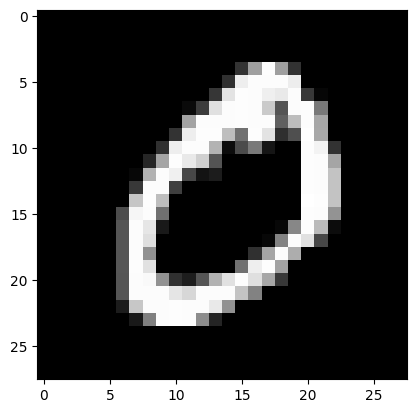

In [47]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))

In [48]:
import numpy as np
np.unique(y_train) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 클래스가 10개

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# 1. 데이터 전처리

In [49]:
# 스케일링 처럼 정규화 0~1사이 값으로 만들어준다.
X_train = X_train / 255
X_test = X_test / 255

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax')) # 알아야하는게 어떤 숫자인건고
# softmax : 확률을 나오게 하는....

준호에게 물어볼 것: softmax, 어떻게

In [51]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2078 - accuracy: 0.9372
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9875


In [53]:
# 모델평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9722


[0.10371016710996628, 0.9721999764442444]

In [54]:
# 예측
result = model.predict(X_test)

313/313 [==============================] - 0s 945us/step


In [55]:
X_test.shape

(10000, 28, 28)

In [56]:
result.shape

(10000, 10)

In [57]:
sample = result[0]
print(np.argmax(sample)) # 예측결과의 인덱스
print(y_test[0]) # 실제

7
7


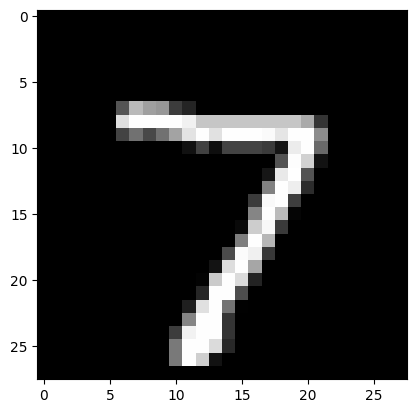

In [58]:
# 실제
plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))

# Flatten Dropout Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation = 'relu')) # dropout 의도적인 정보손실.
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3166 - accuracy: 0.9048
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1444 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1119 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0957 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0822 - accuracy: 0.9758


In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9788


[0.08165676146745682, 0.9787999987602234]

In [73]:
# Flatten : 0.9875 (train) / 0.9721 (test)
# Flatten(Dropout) : 0.9758 (train) / 0.9787(test)

# CNN Model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [74]:
# Flatten : 0.9875 (train) / 0.9721 (test)
# Flatten(Dropout) : 0.9758 (train) / 0.9787(test)

In [76]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1252 - accuracy: 0.9619
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0159 - accuracy: 0.9952


In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0221 - accuracy: 0.9930


[0.022122936323285103, 0.9929999709129333]

In [78]:
# Flatten : 0.9875 (train) / 0.9721 (test)
# Flatten(Dropout) : 0.9758 (train) / 0.9787(test)
# CNN : 0.995(train)  /  0.993 (test)

Lenet